In [2]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-001",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)


In [4]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-001', 'safety_ratings': []}, id='run-96e5f4a2-4c79-44a2-be88-4d6e2ec656f4-0', usage_metadata={'input_tokens': 20, 'output_tokens': 7, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}})

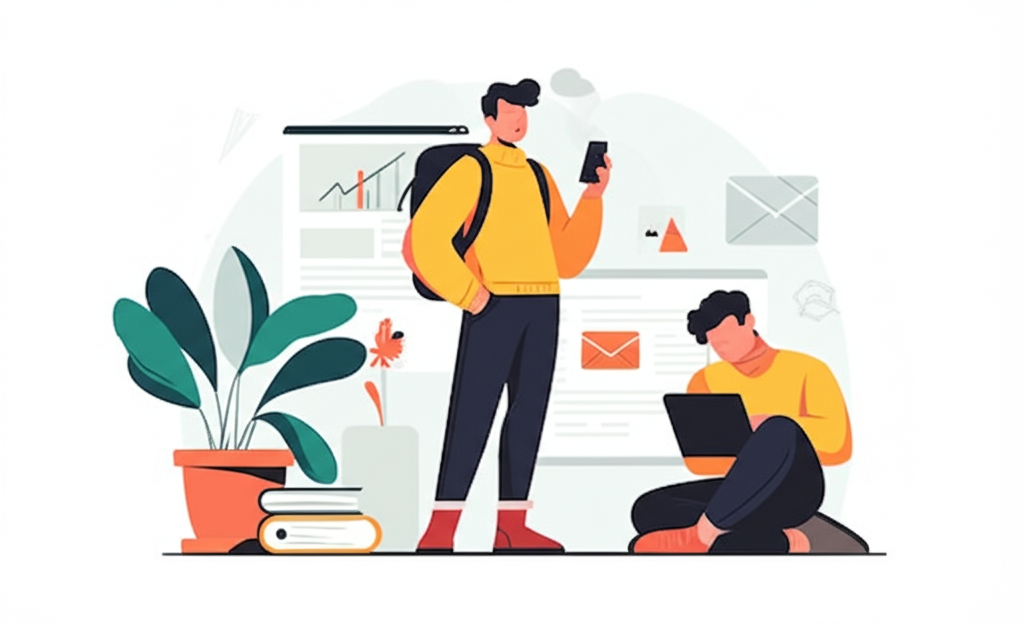

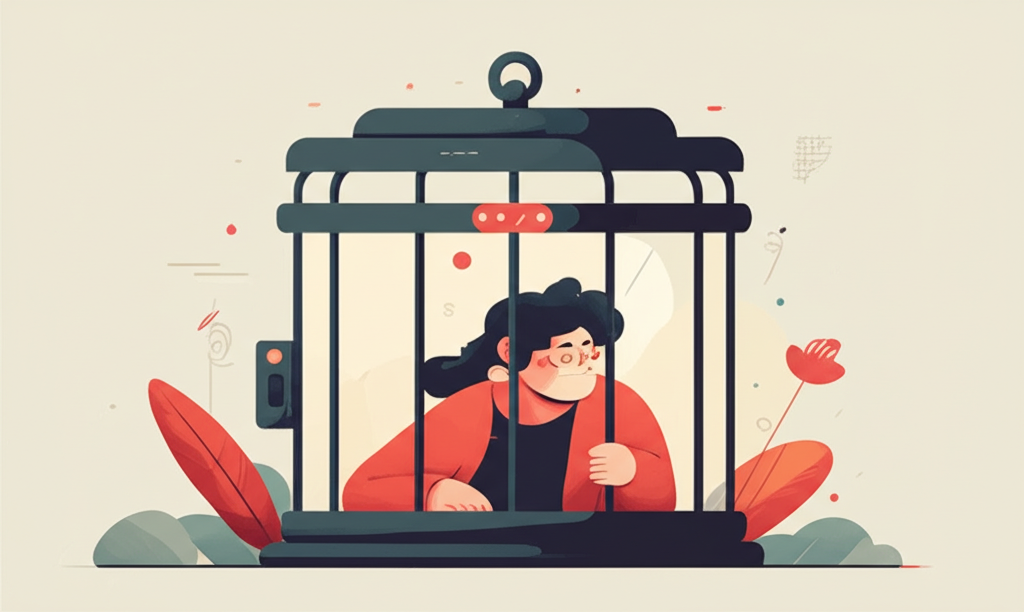

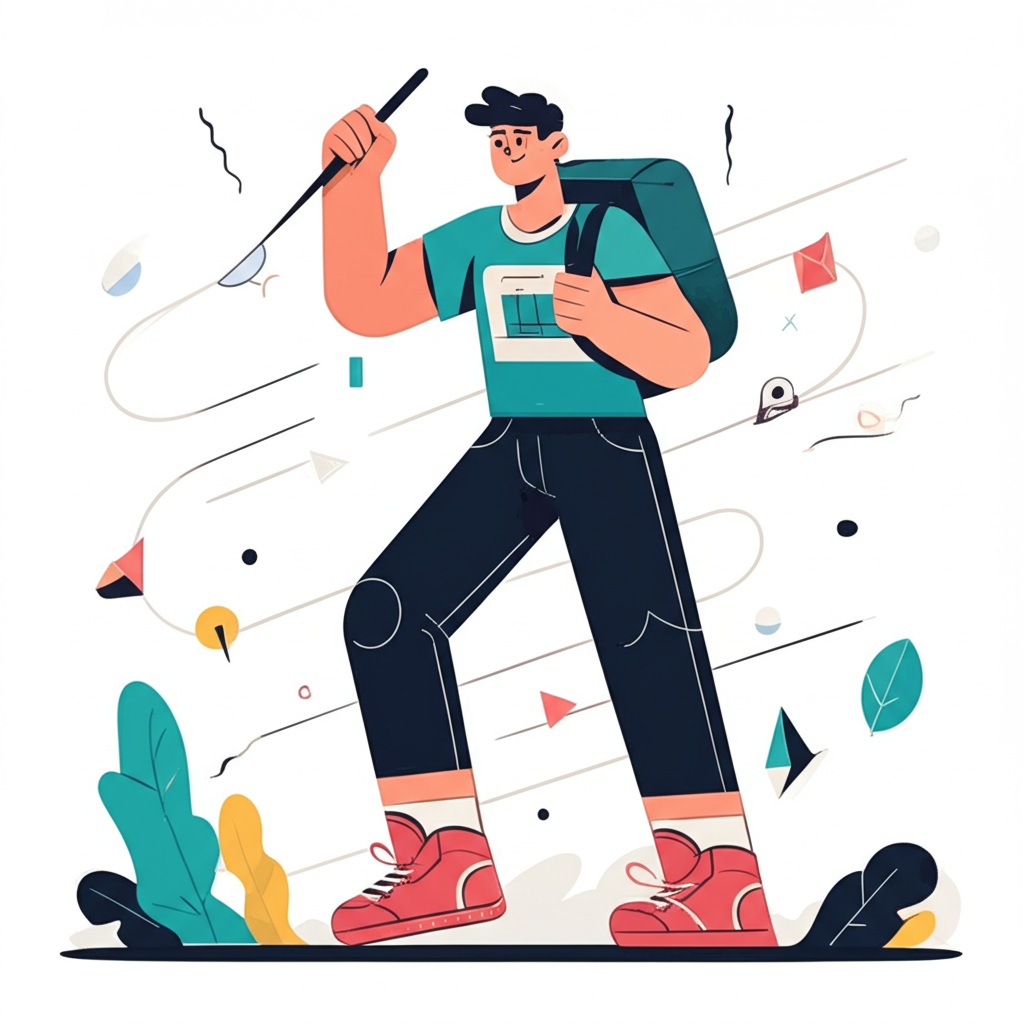

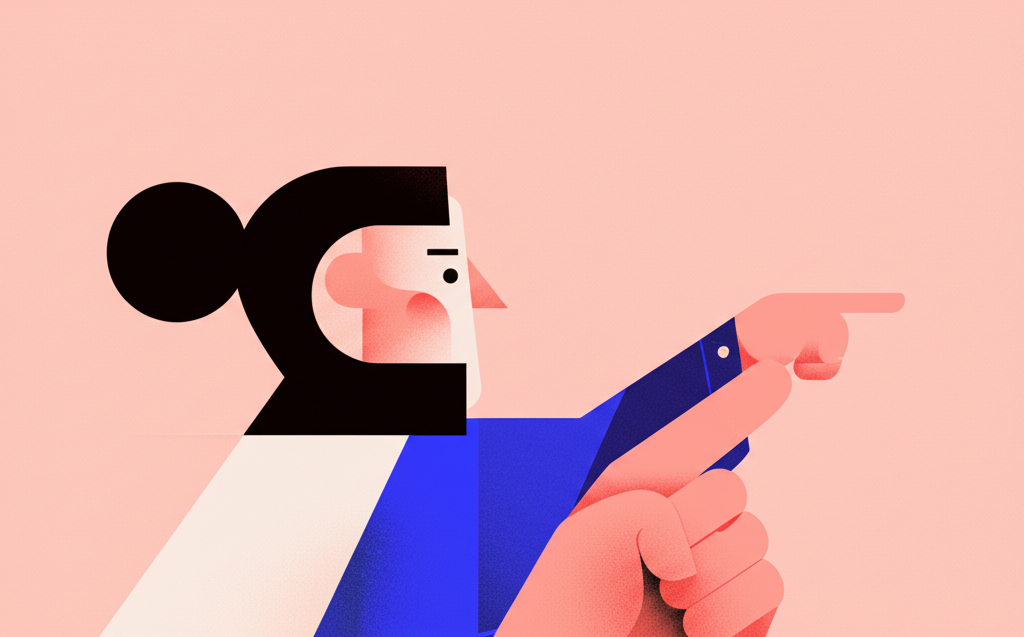

In [19]:
import base64
from io import BytesIO

from IPython.display import Image, display
from langchain_google_genai import ChatGoogleGenerativeAI

image_llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-exp-image-generation")

## Contents right now uses test parameters generated by Gemini
contents = [
    "A persistent unease gnaws at your spirit, a sense that your potential is withering in the current environment.",
    "The daily routine feels like a cage, stifling your creativity and passion, and the promise of a fulfilling career fades with each passing day.",
    "Imagine the exhilaration of stepping into the unknown, of embracing new challenges and opportunities, and of finally pursuing a path that aligns with your true values.",
    "Your future self beckons, urging you to break free and write a new chapter, one where your work brings joy and purpose."
]

for scenario in contents:
    message = {
    "role": "user",
    "content": "Generate a digital illustration in the style of Google's flat design. Generate the images in a fixed resolution of 300x200. Use simple, clean lines and flat, vibrant colors. Incorporate rounded shapes and a minimalist aesthetic. Avoid strong shadows or gradients. Aim for a friendly and approachable style with a playful tone for the following scenario: " + scenario,
    }

    response = image_llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
    )

    image_base64 = response.content[0].get("image_url").get("url").split(",")[-1]

    image_data = base64.b64decode(image_base64)
    display(Image(data=image_data, width=300, height=200))